# Análise de Churn

## 🗂️ Descrição do Projeto

Este projeto é uma **Análise Descritiva e Diagnóstica** de *churn* de clientes de uma empresa de Telecomunicações, desenvolvida totalmente em **Python**.

A análise explora o **perfil dos clientes**, seus **gastos mensais**, o **tempo de permanência** e como o *churn* se distribui considerando **gênero** e **status de parceria**.

O objetivo é identificar **padrões e fatores que podem influenciar o cancelamento**, gerando **insights visuais claros** para apoiar estratégias de retenção de clientes.

## Importando os pacotes necessários

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Dicionário de Variáveis

| Variável           | Descrição                                               |
|--------------------|---------------------------------------------------------|
| `customerID`       | Identificador único do cliente                          |
| `gender`           | Gênero                                                   |
| `SeniorCitizen`    | Se o cliente é idoso (0 = não, 1 = sim)                 |
| `Partner`          | Se o cliente tem parceiro(a)                            |
| `Dependents`       | Se o cliente tem dependentes                            |
| `tenure`           | Tempo (em meses) que o cliente está na empresa          |
| `PhoneService`     | Se o cliente tem serviço de telefone                    |
| `MultipleLines`    | Se tem várias linhas telefônicas                        |
| `InternetService`  | Tipo de serviço de internet                             |
| `OnlineSecurity`   | Se possui segurança online                              |
| `OnlineBackup`     | Se possui backup online                                 |
| `DeviceProtection` | Se possui proteção para dispositivo                     |
| `TechSupport`      | Se possui suporte técnico                               |
| `StreamingTV`      | Se possui serviço de TV por streaming                   |
| `StreamingMovies`  | Se possui serviço de filmes por streaming               |
| `Contract`         | Tipo de contrato (mensal, 1 ano, 2 anos)                |
| `PaperlessBilling` | Se recebe fatura eletrônica                             |
| `PaymentMethod`    | Método de pagamento                                     |
| `MonthlyCharges`   | Valor mensal cobrado                                    |
| `TotalCharges`     | Valor total cobrado                                     |
| `Churn`            | Se o cliente cancelou (Yes/No)                          |

## Exploração Univariada

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Visão geral dos tipos de dados e valores nulos
exploracao = pd.DataFrame({
    "Tipo": df.dtypes,
    "Nulos": df.isnull().sum(),
    "% Nulos": df.isnull().mean() * 100,
    "Valores Únicos" : df.nunique(),
    "Exemplo de Valores" : df.apply(lambda x: x.unique()[:3])
})
exploracao

,Tipo,Nulos,% Nulos,Valores Únicos,Exemplo de Valores
customerID,object,0,0.0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK]"
gender,object,0,0.0,2,"[Female, Male]"
SeniorCitizen,int64,0,0.0,2,"[0, 1]"
Partner,object,0,0.0,2,"[Yes, No]"
Dependents,object,0,0.0,2,"[No, Yes]"
tenure,int64,0,0.0,73,"[1, 34, 2]"
PhoneService,object,0,0.0,2,"[No, Yes]"
MultipleLines,object,0,0.0,3,"[No phone service, No, Yes]"
InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"


No resultado da tabela, podemos ver que não há problemas e não serão necessárias ações para a limpeza de dados
O dataset já se encontra pronto para análise

Agora vamos analisar as variáveis Univariadas

- gender, Partner, Dependents
- tenure, MonthlyCharges, TotalCharges

#### gender (Gênero)

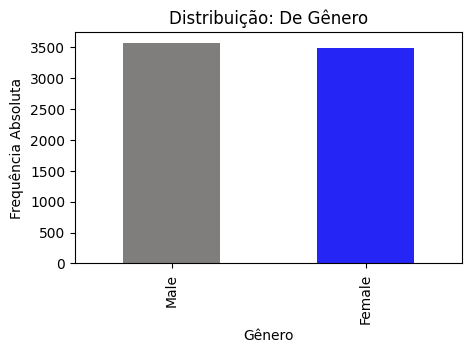

(gender
 Male      3555
 Female    3488
 Name: count, dtype: int64,
 gender
 Male      50.47565
 Female    49.52435
 Name: proportion, dtype: float64,
 array(['Female', 'Male'], dtype=object))

In [27]:
# Análise da coluna 'gender'

coluna = "gender"

# Valores únicos
valores_unicos = df[coluna].unique()

# Frequência absoluta e relativa
frequencia_absoluta = df[coluna].value_counts()
frequencia_relativa = df[coluna].value_counts(normalize=True) * 100

# Gráfico
plt.figure(figsize=(5,3))
frequencia_absoluta.plot(kind='bar', color=["#807D7D", "#2525F5"])
plt.title('Distribuição: De Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência Absoluta')
plt.show()

frequencia_absoluta, frequencia_relativa, valores_unicos


A variável 'gender' é uma variável categórica.

Existem apenas duas variáveis distintas: "Female" e "Male".

Distribuição
- A distribuição está quase que praticamente equilibrada: Male 50,47 e Female 49.52
- Em relação a qualidade dos dados não há nada para ser ajustado.

Análise
- Grande oportunidade para-se verificar a proporção de gênero por churn, dessa forma podemos verificar se tem algum impacto em relação ao gênero

#### Partner (Parceiro)

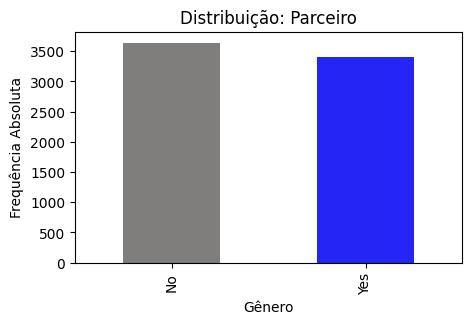

(Partner
 No     3641
 Yes    3402
 Name: count, dtype: int64,
 Partner
 No     51.69672
 Yes    48.30328
 Name: proportion, dtype: float64,
 2)

In [38]:
coluna = "Partner"

valores_unicos = df[coluna].nunique()
frequencia_absoluta = df[coluna].value_counts()
frequencia_relativa = df[coluna].value_counts(normalize=True) * 100

# Gráfico
plt.figure(figsize=(5, 3))
frequencia_absoluta.plot(kind='bar', color=["#807D7D", "#2525F5"])
plt.title('Distribuição: Parceiro')
plt.xlabel('Gênero')
plt.ylabel('Frequência Absoluta')
plt.show()

frequencia_absoluta, frequencia_relativa, valores_unicos

A variável 'Partner' é uma variável categórica.

Existem apenas duas variáveis distintas: "Yes" e "No".

Distribuição
- A distribuição está quase que praticamente equilibrada também: Yes 48,30 e No 51.69

Análise
- Podemos analisar se ter algum parceiro/relacionamento influência no aumento de churn(cancelamento), diminuição ou se não existe nenhuma influência

#### Dependents (Dependentes)

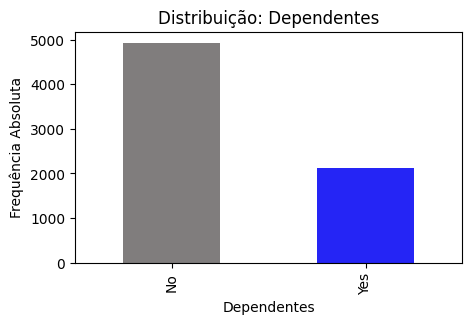

(Dependents
 No     4933
 Yes    2110
 Name: count, dtype: int64,
 Dependents
 No     70.041176
 Yes    29.958824
 Name: proportion, dtype: float64,
 2)

In [48]:
coluna = "Dependents"

# Valores únicos
valores_unicos = df[coluna].nunique()

frequencia_absoluta = df[coluna].value_counts()
frequencia_relativa = df[coluna].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
frequencia_absoluta.plot(kind='bar', color=["#807D7D", "#2525F5"])
plt.title("Distribuição: Dependentes")
plt.xlabel("Dependentes")
plt.ylabel("Frequência Absoluta")
plt.show()

frequencia_absoluta, frequencia_relativa, valores_unicos

A variável Dependents é uma variável categórica.
Existem apenas duas variáveis distintas: "Yes" e "No"

Distribuição
- A distribuição já é desproporcional com "70%" Dos clientes não possuindo dependentes e 30% Possuindo Dependentes

Análise
- Podemos analisar se a variável e essa resultado desproporcional influencia ou não no aumento de churn ou se não tem relevência no aumento ou queda de churn

#### Tenure (Meses que o cliente está na empresa)

Top 10 Meses Com Maior Frequência
tenure
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: count, dtype: int64


(73,
 count    7043.000000
 mean       32.371149
 std        24.559481
 min         0.000000
 25%         9.000000
 50%        29.000000
 75%        55.000000
 max        72.000000
 Name: tenure, dtype: float64)

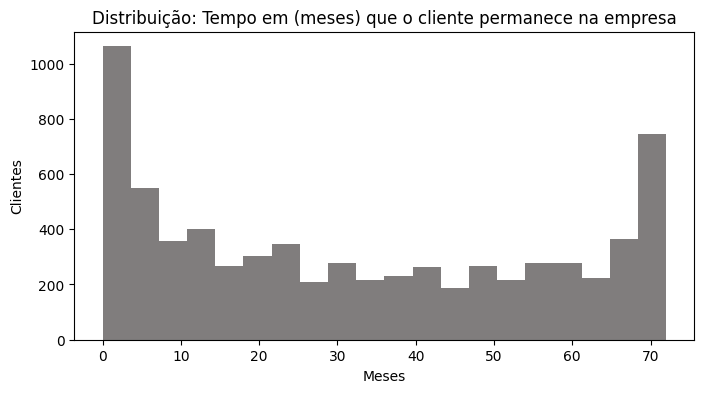

In [59]:
meses = 'tenure'

valores_unicos = df[meses].nunique()
descritivo = df[meses].describe()


# Frequência dos meses mais comuns Top (10)
top_10meses = df[meses].value_counts().head(10)
print('Top 10 Meses Com Maior Frequência')
print(top_10meses)

# Histograma para verificas a distribuição/Concentração
plt.figure(figsize=(8, 4))
plt.hist(df[meses], bins=20, color='#807D7D')
plt.title('Distribuição: Tempo em (meses) que o cliente permanece na empresa')
plt.xlabel('Meses')
plt.ylabel('Clientes')


valores_unicos, descritivo

A variável **Tenure** representa o **tempo em meses que o cliente permanece na empresa é registrada como discreta numérica.**

Podemos notar que os meses iniciam no mês 0, primerio mês que o cliente acabou de adquirir ou contratar o serviço, até o mês 70 que equivale a 5 anos e 8 meses. o que significa que o cliente mais antigo está na base há **cerca de 5 anos e 8 meses**. 

Não foi detectado Outliers 

Podemos ver também que os meses com maior frequência se localiza nós primeiros meses com clientes recém chegados ou clientes mais fiéis que permaneceram com o serviço

Distribuição
- A média é de **aproximadamente 32 meses, mediana de 29 meses, com um desvio padrão alto de 24.55** 
- significando que os dados estão muito dispersos em relação a média, **nota-se que o gráfico demonstra isso com uma maior concentração de cliente nas extremidades**, significa que a permanência dos clientes se encontram dispersos da média, centro, com um tempo de permanência de metade dos clientes com **2 anos e 6 meses**.

Análise
- Essa variabilidade sugere **grupos de clientes recém chegados até clientes mais fiéis**. O que pode ser interessante para verificar algum padrão de churn



#### MonthlyCharges (Valor Mensal Cobrado)

(1585,
 count    7043.000000
 mean       64.761692
 std        30.090047
 min        18.250000
 25%        35.500000
 50%        70.350000
 75%        89.850000
 max       118.750000
 Name: MonthlyCharges, dtype: float64)

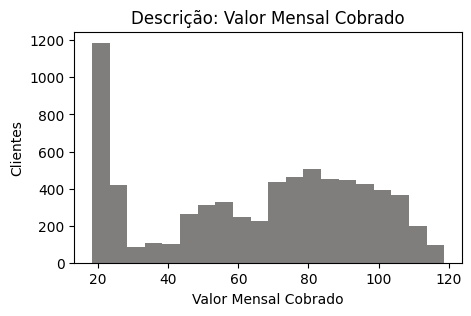

In [68]:
coluna = 'MonthlyCharges'

valores_unicos = df[coluna].nunique()
descricao = df[coluna].describe()

plt.figure(figsize=(5, 3))
plt.title('Descrição: Valor Mensal Cobrado')
plt.xlabel('Valor Mensal Cobrado')
plt.ylabel('Clientes')
plt.hist(df[coluna], bins=20, color=['#807D7D'])

valores_unicos, descricao

A variável MonthlyCharges representa **o valor mensal cobrado, é registrado como variável numérica contínua**

Não foi detectado Outliers em relação a algum valor discrepante.

E não foi detectado algum valor nulo ou valor ausente

Distribuição
- A média é de **64.76 valor cobrado por mês** , mediana de 70,35 e desvio padrão de 30 indicando uma dispersão de valor cobrado, **com metadeos clientes sendo cobrado o valor menor que 70,25**
- Histograma demonstra uma alta concentração no início, **indicando que uma alta quantidade de clientes paga um menor valor por mês** e uma cauda para a direita com cobranças mais altas.

Análise
- Podemos verificar se MonthlyCharges é relevante pro churn



#### TotalCharges (Valor Total Cobrado)

In [82]:
# Convertendo TotalCharges para numérico

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].dtypes

dtype('float64')

In [95]:
# Verificando se há valores nulos
# 11 Valores Nulos
df["TotalCharges"].isnull().sum()

np.int64(11)

In [94]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


(6530,
 count    7032.000000
 mean     2283.300441
 std      2266.771362
 min        18.800000
 25%       401.450000
 50%      1397.475000
 75%      3794.737500
 max      8684.800000
 Name: TotalCharges, dtype: float64)

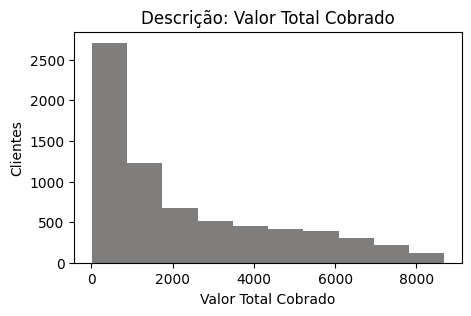

In [84]:
coluna = "TotalCharges"

valores_unicos = df[coluna].nunique()
descricao = df[coluna].describe()

plt.figure(figsize=(5, 3))
plt.title("Descrição: Valor Total Cobrado")
plt.xlabel("Valor Total Cobrado")
plt.ylabel("Clientes")
plt.hist(df[coluna], color=["#807D7D"])

valores_unicos, descricao

A variável **TotalCharges é uma variável do tipo discreta contínua**

Não foi detectado Outliers,

